In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('gold.csv')
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [23]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [24]:
resampled_data = data['EURO (PM)'].resample('Y').sum().to_frame()
resampled_data.head()

,EURO (PM)
Date,
2001-12-31,76003.233
2002-12-31,82013.701
2003-12-31,80634.106
2004-12-31,82924.128
2005-12-31,89579.195


In [25]:
resampled_data.index = resampled_data.index.year

In [26]:
resampled_data.reset_index(inplace=True)
resampled_data.rename(columns={'Date': 'Year'}, inplace=True)

In [27]:
resampled_data.head()

,Year,EURO (PM)
0,2001,76003.233
1,2002,82013.701
2,2003,80634.106
3,2004,82924.128
4,2005,89579.195


In [28]:
years = resampled_data['Year'].tolist()
Euro = resampled_data['EURO (PM)'].tolist()

In [29]:
X = [i - years[len(years) // 2] for i in years]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, Euro)]

n = len(years)
b = (n * sum(xy) - sum(Euro) * sum(X)) / (n * sum(x2) - (sum(X) ** 2))
a = (sum(Euro) - b * sum(X)) / n
linear_trend = [a + b * X[i] for i in range(n)]

In [30]:
x3 = [i ** 3 for i in X]
x4 = [i ** 4 for i in X]
x2y = [i * j for i, j in zip(x2, Euro)]

coeff = [[len(X), sum(X), sum(x2)],
         [sum(X), sum(x2), sum(x3)],
         [sum(x2), sum(x3), sum(x4)]]

Y = [sum(Euro), sum(xy), sum(x2y)]
A = np.array(coeff)
B = np.array(Y)

solution = np.linalg.solve(A, B)
a_poly, b_poly, c_poly = solution
poly_trend = [a_poly + b_poly * X[i] + c_poly * (X[i] ** 2) for i in range(n)]

In [31]:
print(f"Linear Trend: y={a:.2f} + {b:.2f}x")
print(f"\nPolynomial Trend: y={a_poly:.2f} + {b_poly:.2f}x + {c_poly:.2f}x²")

Linear Trend: y=190691.38 + 13051.01x

Polynomial Trend: y=218196.53 + 13051.01x + -916.84x²


In [32]:
resampled_data['Linear Trend'] = linear_trend
resampled_data['Polynomial Trend'] = poly_trend

In [33]:
resampled_data.set_index('Year',inplace=True)

<Axes: xlabel='Year'>

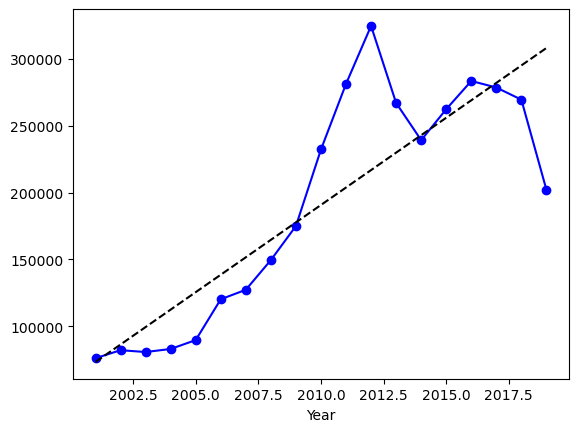

In [34]:
resampled_data['EURO (PM)'].plot(kind='line',color='blue',marker='o') 
resampled_data['Linear Trend'].plot(kind='line',color='black',linestyle='--')

<Axes: xlabel='Year'>

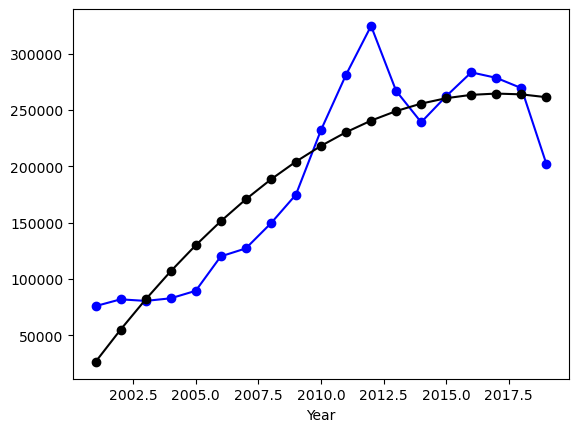

In [35]:
resampled_data['EURO (PM)'].plot(kind='line',color='blue',marker='o')
resampled_data['Polynomial Trend'].plot(kind='line',color='black',marker='o')